<a href="https://colab.research.google.com/github/carolyn155/cisc351_course_project/blob/master/TradingAlg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install required dependencies
!pip install matplotlib keras --no-cache-dir
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
import pandas as pd
import numpy as np
import matplotlib

# Description 

The dataset used for this experiment is the New York Stock Exchange dataset from Kaggle, found at https://www.kaggle.com/dgawlik/nyse. 

The trading algorithm is constructed to predict stock trading for Netflix and for Yahoo, which are both large technology companies based in California. These companies are both in the Information Technology GICS Sector, and in the Internet Software & Services GICS Sub Industry.

# Import Data and Data Exploration 

In [0]:
pd.set_option('max_columns', None)

## Securities dataset

In [4]:
# import the securities data to a dataframe 
# securities = pd.read_csv("./nyse/securities.csv")
securities = pd.read_csv("./securities.csv")
securities.head(5)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [5]:
# get info on the securities data for the GCIS Sector column 
num_securities = len(securities) # get the number of securities 
gics_sector_values = np.unique(securities['GICS Sector']) # get the unique GICS Sector Values 

print('The number of securities is', num_securities)
print('\nThe GICS Sectors are',  sep=', ', *gics_sector_values)

The number of securities is 505

The GICS Sectors are, Consumer Discretionary, Consumer Staples, Energy, Financials, Health Care, Industrials, Information Technology, Materials, Real Estate, Telecommunications Services, Utilities


In [6]:
# get the rows where the value in GICS Sector column is 'Information Technology'
it_securities = securities.loc[securities['GICS Sector'] == 'Information Technology'] # get the IT securities
num_it_securities = len(it_securities) # get the number of IT securities 
it_securities_symbols = np.unique(it_securities['Ticker symbol']) # get the unique GICS Sector Values 

print('The number of IT securities is', num_it_securities)
print('The ticker symbols of the IT securities are ', sep=', ', *it_securities_symbols)

The number of IT securities is 68
The ticker symbols of the IT securities are , AAPL, ACN, ADBE, ADI, ADP, ADS, ADSK, AKAM, AMAT, APH, ATVI, AVGO, CA, CRM, CSCO, CSRA, CTSH, CTXS, EA, EBAY, FB, FFIV, FIS, FISV, FLIR, FSLR, GLW, GOOG, GOOGL, GPN, HPE, HPQ, HRS, IBM, INTC, INTU, JNPR, KLAC, LLTC, LRCX, MA, MCHP, MSFT, MSI, MU, NFLX, NTAP, NVDA, ORCL, PAYX, PYPL, QCOM, QRVO, RHT, STX, SWKS, SYMC, TDC, TEL, TSS, TXN, V, VRSN, WDC, WU, XLNX, XRX, YHOO


In [7]:
# get info on the securities data for the GICS Sub Industry column for values in the IT GCIS Sector 
gics_sub_it_values = np.unique(it_securities['GICS Sub Industry']) # get the unique GICS Sub Industry values 

print('\nThe GICS Sub Industries in the IT GCIS Sector are',  sep=', ', *gics_sub_it_values)


The GICS Sub Industries in the IT GCIS Sector are, Application Software, Computer Hardware, Computer Storage & Peripherals, Data Processing & Outsourced Services, Electronic Components, Electronic Equipment & Instruments, Electronic Manufacturing Services, Home Entertainment Software, IT Consulting & Other Services, Internet Software & Services, Networking Equipment, Semiconductor Equipment, Semiconductors, Systems Software, Technology Hardware, Storage & Peripherals, Telecommunications Equipment


In [8]:
# Get the values where the value in the GICS Sub Industry column is 'Internet Software & Services' from the dataframe 
# where the value in the GICS sector column is 'Infromation Technology'
soft_securities = it_securities.loc[it_securities['GICS Sub Industry'] == 'Internet Software & Services'] 
num_soft_securities = len(soft_securities)
soft_securities_symbols = np.unique(soft_securities['Ticker symbol']) # get the unique GICS Sub Industry values 

print('The number of Internet Software & Services securities is', num_soft_securities)
print('The ticker symbols of the Internet Software & Services securities are', sep=', ', *soft_securities_symbols)

The number of Internet Software & Services securities is 20
The ticker symbols of the Internet Software & Services securities are, ADP, AKAM, CRM, CTXS, EBAY, FB, FIS, FISV, GOOG, GOOGL, INTU, MA, NFLX, NTAP, PAYX, TSS, V, VRSN, WU, YHOO


In [9]:
# drop the columns that are now constant for the soft_securities dataframe 
soft_securities = soft_securities.drop(columns=['GICS Sector', 'GICS Sub Industry'])
soft_securities.head(5)

,Ticker symbol,Security,SEC filings,Address of Headquarters,Date first added,CIK
14,AKAM,Akamai Technologies Inc,reports,"Cambridge, Massachusetts",2007-07-12,1086222
23,GOOGL,Alphabet Inc Class A,reports,"Mountain View, California",2014-04-03,1652044
24,GOOG,Alphabet Inc Class C,reports,"Mountain View, California",NaN,1652044
53,ADP,Automatic Data Processing,reports,"Roseland, New Jersey",1981-03-31,8670
109,CTXS,Citrix Systems,reports,"Fort Lauderdale, Florida",NaN,877890


In [10]:
# select the securities for Yahoo and Netflix
yahoo_sec = soft_securities.loc[soft_securities['Ticker symbol'] == "YHOO"]
netflix_sec = soft_securities.loc[soft_securities['Ticker symbol'] == "NFLX"] 

print('The Yahoo security is:') 
display(yahoo_sec)

print('\nThe Netflix security is:')
display(netflix_sec)

The Yahoo security is:


,Ticker symbol,Security,SEC filings,Address of Headquarters,Date first added,CIK
500,YHOO,Yahoo Inc.,reports,"Sunnyvale, California",NaN,1011006



The Netflix security is:


,Ticker symbol,Security,SEC filings,Address of Headquarters,Date first added,CIK
322,NFLX,Netflix Inc.,reports,"Los Gatos, California",2010-12-20,1065280


## Prices dataset

Since we have the adjusted prices, this dataset is not used for constructing the model.

In [11]:
# prices dataset 
# prices = pd.read_csv("./nyse/prices.csv", parse_dates=['date'])
prices = pd.read_csv("./prices.csv", parse_dates=['date'])
prices.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [12]:
# select all the stocks for Netflix and set the index to date
# https://www.kaggle.com/residentmario/time-series-plotting-optional
netflix_prices = prices.loc[prices['symbol'] == "NFLX"].set_index('date')
netflix_prices.head(5)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,NFLX,55.519999,53.479999,52.960001,55.730000,17239600.0
2010-01-05,NFLX,53.570001,51.510001,50.810001,53.599998,23753100.0
2010-01-06,NFLX,51.530001,53.319999,50.380002,53.710001,23290400.0
2010-01-07,NFLX,54.120000,52.400001,52.240001,54.300001,9955400.0
2010-01-08,NFLX,52.490000,53.300002,52.260001,54.199999,8180900.0


In [13]:
# do the same for Yahoo
yahoo_prices = prices.loc[prices['symbol'] == "YHOO"].set_index('date')
yahoo_prices.head(5)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


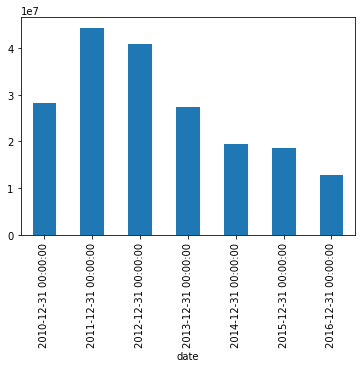

In [14]:
# visualize the Google stock data by year
# https://www.kaggle.com/residentmario/time-series-plotting-optional
netflix_prices['volume'].resample('Y').mean().plot.bar()

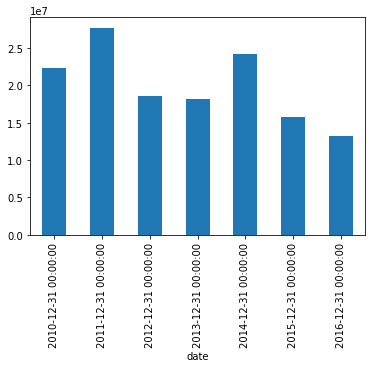

In [15]:
# do the same for Yahoo
yahoo_prices['volume'].resample('Y').mean().plot.bar()

## Fundamentals dataset 

In [16]:
# fundamentals = pd.read_csv("./nyse/fundamentals.csv")
fundamentals = pd.read_csv("./fundamentals.csv")
fundamentals = fundamentals.rename(columns={'Unnamed: 0': 'idx'})
fundamentals.index = fundamentals.idx
fundamentals = fundamentals.drop(columns=['idx'])
fundamentals.head(5)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.5620

In [17]:
# check if the ticker symbols in the list from soft_securities are the same in fundamentals 
# make a sub array for this 
soft_fundamentals = fundamentals.loc[fundamentals['Ticker Symbol'].isin(soft_securities_symbols)]
soft_fundamentals.head(5)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72,AKAM,2012-12-31,176378000.0,-2108000.0,7104000.0,9.0,-166773000.0,5.195543e+09,216.0,201989000.0,0.0,2015000.0,529900000.0,359.0,21427000.0,2565000.0,204163000.0,321591000.0,321591000.0,-89000.0,0.0,345091000.0,7.237010e+08,61.0,8.440470e+08,117602000.0,84554000.0,0.0,0.0,-222277000.0,59946000.0,0.0,657659000.0,0.0,0.0,0.0,-357208000.0,530020000.0,-108029000.0,-7.791100e+08,203989000.0,61438000.0,203989000.0,203989000.0,239199000.0,406000.0,314487000.0,23.0,39811000.0,51604000.0,2.656600e+07,-1640000.0,-34690000.0,-390060000.0,49364000.0,2592000.0,20962000.0,23.0,14.0,15.0,359.0,74744000.0,-2.225702e+09,-96354000.0,4.334480e+08,0.0,235592000.0,2.600627e+09,7.283840e+08,2.029440e+08,2.345754e+09,2.548730e+08,2.600627e+09,1.373947e+09,-624462000.0,2012.0,1.15,1.773817e+08
73,AKAM,2013-12-31,224095000.0,-67184000.0,5586000.0,11.0,-187964000.0,4.561929e+09,256.0,333891000.0,0.0,1808000.0,511087000.0,391.0,2325000.0,7936000.0,184431000.0,419554000.0,419554000.0,-3655000.0,0.0,450287000.0,7.573680e+08,68.0,1.066835e+09,126067000.0,77429000.0,0.0,0.0,-19750000.0,52080000.0,0.0,573026000.0,0.0,0.0,0.0,131902000.0,563908000.0,-115243000.0,-3.131080e+08,293487000.0,101602000.0,293487000.0,293487000.0,293722000.0,1843000.0,413968000.0,26.0,67536000.0,62096000.0,3.907100e+07,-2091000.0,-41332000.0,-105394000.0,57152000.0,-508000.0,21547000.0,27.0,16.0,19.0,391.0,93879000.0,-1.932215e+09,-96712000.0,5.355980e+08,0.0,340005000.0,2.957685e+09,1.029714e+09,2.631660e+08,2.629431e+09,3.282540e+08,2.957685e+09,1.577922e+09,0.0,2013.0,1.65,1.778709e+08
74,AKAM,2014-12-31,282098000.0,-58397000.0,5720000.0,11.0,-207159000.0,4.559430e+09,227.0,238650000.0,0.0,1783000.0,610943000.0,378.0,1955000.0,43128000.0,262869000.0,495239000.0,479776000.0,-10532000.0,0.0,601591000.0,1.051294e+09,69.0,1.352931e+09,145828000.0,132412000.0,15463000.0,0.0,-479392000.0,101721000.0,604851000.0,869992000.0,0.0,0.0,660873000.0,-95241000.0,658070000.0,436027000.0,-1.178806e+09,333948000.0,56443000.0,333948000.0,333948000.0,375282000.0,1189000.0,489519000.0,25.0,81747000.0,128981000.0,5.191300e+07,-17611000.0,-52224000.0,-492255000.0,74221000.0,-38514000.0,32057000.0,24.0,16.0,17.0,378.0,125286000.0,-1.598267e+09,-103568000.0,7.048800e+08,0.0,519642000.0,4.001546e+09,1.262555e+09,3.340110e+08,2.945335e+09,1.056211e+09,4.001546e+09,1.963874e+09,0.0,2014.0,1.87,1.785818e+08
75,AKAM,201

In [18]:
soft_fundamentals.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,68.000000,68.000000,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,63.000000,59.000000,5.900000e+01
mean,1.220831e+09,-9.752422e+07,2.305987e+08,76.147059,-3.669658e+08,7.186608e+09,158.911765,2.085974e+09,7.913529e+05,1.536861e+08,1.743619e+09,233.514706,1.231675e+08,1.104988e+09,7.080881e+08,1.984866e+09,1.925224e+09,-2.728666e+07,4.840374e+07,1.010938e+09,3.878708e+09,67.544118,4.250491e+09,5.598192e+08,1.860245e+09,5.964271e+07,8.171574e+06,-3.168639e+08,2.005440e+08,1.836478e+09,1.959836e+09,1.281543e+07,4.189279e+06,4.929729e+08,1.809251e+08,1.971450e+09,-7.020578e+08,-1.062063e+09,1.434091e+09,-8.204222e+07,1.432317e+09,1.411883e+09,1.074628e+09,9.544096e+07,1.730974e+09,27.588235,5.184057e+08,1.033073e+09,1.537813e+09,5.449236e+08,-6.993971e+06,-3.782335e+08,4.956915e+08,-2.765093e+08,5.945732e+07,31.323529,97.514706,24.088235,233.235294,5.521731e+08,3.447714e+09,-1.031644e+09,1.815974e+09,6.274394e+08,1.827070e+09,1.538022e+10,6.028917e+09,3.386083e+09,8.539972e+09,6.840245e+09,1.538022e+10,5.994110e+09,-2.877034e+09,2013.936508,1.841186,5.499556e+08
std,1.240152e+09,2.607868e+08,1.381831e+09,413.912900,6.481157e+08,8.393315e+09,218.145969,2.136252e+09,7.488910e+06,5.952021e+08,1.393547e+09,245.029300,5.606735e+08,2.749162e+09,8.627779e+08,2.877740e+09,2.879927e+09,6.626136e+07,1.886865e+08,1.331560e+09,4.703768e+09,22.667903,4.114181e+09,1.042655e+09,4.048254e+09,8.262302e+07,3.028399e+07,1.532962e+09,8.577473e+08,2.803574e+09,6.819011e+09,3.340708e+07,1.387594e+07,2.077269e+09,1.022805e+09,2.763911e+09,1.696634e+09,2.539364e+09,2.263661e+09,2.269524e+09,2.264393e+09,2.275009e+09,1.705465e+09,5.

## Prices split adjusted dataset

In [19]:
# get the prices split adjusted dataset and store in a dataframe 
# prices_adj = pd.read_csv("./nyse/prices-split-adjusted.csv", parse_dates=['date'])
prices_adj = pd.read_csv("./prices-split-adjusted.csv", parse_dates=['date'])
prices_adj.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [20]:
# get the prices split adjusted for only the symbols in the Internet Software & Services  
# mke a sub array for this
soft_prices_adj = prices_adj.loc[prices_adj['symbol'].isin(soft_securities_symbols)]
soft_prices_adj.head(5)

,date,symbol,open,close,low,high,volume
261,2010-01-04,ADP,38.226514,37.603162,37.489027,38.226514,3930100.0
273,2010-01-04,AKAM,25.629999,25.920000,25.530001,26.059999,3015600.0
355,2010-01-04,CRM,18.652500,18.705000,18.547501,18.882500,7906000.0
361,2010-01-04,CTXS,42.040001,42.840000,41.910000,42.869999,1680700.0
389,2010-01-04,EBAY,9.983165,10.058923,9.941077,10.092592,22511600.0


# Feature Engineering

In [0]:
# filter the warnings out 
import warnings
warnings.filterwarnings("ignore")

## Parse date

### soft_prices_adj

In [22]:
# convert date column in soft_prices_adj to datetime type 
soft_prices_adj['date'] = pd.to_datetime(soft_prices_adj['date']) 
soft_prices_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34486 entries, 261 to 851257
Data columns (total 7 columns):
date      34486 non-null datetime64[ns]
symbol    34486 non-null object
open      34486 non-null float64
close     34486 non-null float64
low       34486 non-null float64
high      34486 non-null float64
volume    34486 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.1+ MB


In [23]:
# parse date to different features for datetime datatype in soft_prices adj
soft_prices_adj['year'] = soft_prices_adj.date.dt.year
soft_prices_adj['month'] = soft_prices_adj.date.dt.month
soft_prices_adj['day'] = soft_prices_adj.date.dt.day
soft_prices_adj.head(5)

,date,symbol,open,close,low,high,volume,year,month,day
261,2010-01-04,ADP,38.226514,37.603162,37.489027,38.226514,3930100.0,2010,1,4
273,2010-01-04,AKAM,25.629999,25.920000,25.530001,26.059999,3015600.0,2010,1,4
355,2010-01-04,CRM,18.652500,18.705000,18.547501,18.882500,7906000.0,2010,1,4
361,2010-01-04,CTXS,42.040001,42.840000,41.910000,42.869999,1680700.0,2010,1,4
389,2010-01-04,EBAY,9.983165,10.058923,9.941077,10.092592,22511600.0,2010,1,4


In [24]:
# sort values by the date and symbol 
soft_prices_adj.sort_values(['symbol', 'date'], inplace=True)
soft_prices_adj.head(5)

,date,symbol,open,close,low,high,volume,year,month,day
261,2010-01-04,ADP,38.226514,37.603162,37.489027,38.226514,3930100.0,2010,1,4
728,2010-01-05,ADP,37.445127,37.401232,37.199301,37.673399,3252400.0,2010,1,5
1196,2010-01-06,ADP,37.576823,37.313436,36.918352,37.655840,3111400.0,2010,1,6
1664,2010-01-07,ADP,36.988588,37.295874,36.953471,37.313436,2513300.0,2010,1,7
2132,2010-01-08,ADP,37.243197,37.243197,36.909571,37.278314,2310400.0,2010,1,8


### soft_fundamentals

In [25]:
# convert date column in soft_fundamentals to datetime type 
soft_fundamentals['Period Ending'] = pd.to_datetime(soft_fundamentals['Period Ending']) 
soft_fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 72 to 1764
Data columns (total 78 columns):
Ticker Symbol                                          68 non-null object
Period Ending                                          68 non-null datetime64[ns]
Accounts Payable                                       68 non-null float64
Accounts Receivable                                    68 non-null float64
Add'l income/expense items                             68 non-null float64
After Tax ROE                                          68 non-null float64
Capital Expenditures                                   68 non-null float64
Capital Surplus                                        68 non-null float64
Cash Ratio                                             68 non-null float64
Cash and Cash Equivalents                              68 non-null float64
Changes in Inventories                                 68 non-null float64
Common Stocks                                          68 non-n

In [26]:
# shift a year ahead in securities to avoid data leakage (i.e. use 2012 data in 2013), suggested by: 
# https://www.kaggle.com/benjibb/entity-embedding-neural-network#Data-preprocessin
soft_fundamentals['year_inc'] = soft_fundamentals['For Year'] + 1
soft_fundamentals.year_inc.fillna(soft_fundamentals['Period Ending'].dt.year + 1, inplace=True) # fill in missing values with year of period ending+1
soft_fundamentals = soft_fundamentals.drop(columns=['For Year', 'Period Ending'])
soft_fundamentals.year_inc = soft_fundamentals.year_inc.astype(int) # convert to int 
soft_fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 72 to 1764
Data columns (total 77 columns):
Ticker Symbol                                          68 non-null object
Accounts Payable                                       68 non-null float64
Accounts Receivable                                    68 non-null float64
Add'l income/expense items                             68 non-null float64
After Tax ROE                                          68 non-null float64
Capital Expenditures                                   68 non-null float64
Capital Surplus                                        68 non-null float64
Cash Ratio                                             68 non-null float64
Cash and Cash Equivalents                              68 non-null float64
Changes in Inventories                                 68 non-null float64
Common Stocks                                          68 non-null float64
Cost of Revenue                                        68 non-null flo

In [27]:
# sort values by the date and symbol 
soft_fundamentals.sort_values(['Ticker Symbol', 'year_inc'], inplace=True)
soft_fundamentals.head(5)

,Ticker Symbol,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,year_inc
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72,AKAM,176378000.0,-2108000.0,7104000.0,9.0,-166773000.0,5.195543e+09,216.0,201989000.0,0.0,2015000.0,529900000.0,359.0,21427000.0,2565000.0,204163000.0,321591000.0,321591000.0,-89000.0,0.0,345091000.0,7.237010e+08,61.0,8.440470e+08,117602000.0,84554000.0,0.0,0.0,-222277000.0,59946000.0,0.0,657659000.0,0.0,0.0,0.0,-357208000.0,530020000.0,-108029000.0,-7.791100e+08,203989000.0,61438000.0,203989000.0,203989000.0,239199000.0,406000.0,314487000.0,23.0,39811000.0,51604000.0,2.656600e+07,-1640000.0,-34690000.0,-390060000.0,49364000.0,2592000.0,20962000.0,23.0,14.0,15.0,359.0,74744000.0,-2.225702e+09,-96354000.0,4.334480e+08,0.0,235592000.0,2.600627e+09,7.283840e+08,2.029440e+08,2.345754e+09,2.548730e+08,2.600627e+09,1.373947e+09,-624462000.0,1.15,1.773817e+08,2013
73,AKAM,224095000.0,-67184000.0,5586000.0,11.0,-187964000.0,4.561929e+09,256.0,333891000.0,0.0,1808000.0,511087000.0,391.0,2325000.0,7936000.0,184431000.0,419554000.0,419554000.0,-3655000.0,0.0,450287000.0,7.573680e+08,68.0,1.066835e+09,126067000.0,77429000.0,0.0,0.0,-19750000.0,52080000.0,0.0,573026000.0,0.0,0.0,0.0,131902000.0,563908000.0,-115243000.0,-3.131080e+08,293487000.0,101602000.0,293487000.0,293487000.0,293722000.0,1843000.0,413968000.0,26.0,67536000.0,62096000.0,3.907100e+07,-2091000.0,-41332000.0,-105394000.0,57152000.0,-508000.0,21547000.0,27.0,16.0,19.0,391.0,93879000.0,-1.932215e+09,-96712000.0,5.355980e+08,0.0,340005000.0,2.957685e+09,1.029714e+09,2.631660e+08,2.629431e+09,3.282540e+08,2.957685e+09,1.577922e+09,0.0,1.65,1.778709e+08,2014
74,AKAM,282098000.0,-58397000.0,5720000.0,11.0,-207159000.0,4.559430e+09,227.0,238650000.0,0.0,1783000.0,610943000.0,378.0,1955000.0,43128000.0,262869000.0,495239000.0,479776000.0,-10532000.0,0.0,601591000.0,1.051294e+09,69.0,1.352931e+09,145828000.0,132412000.0,15463000.0,0.0,-479392000.0,101721000.0,604851000.0,869992000.0,0.0,0.0,660873000.0,-95241000.0,658070000.0,436027000.0,-1.178806e+09,333948000.0,56443000.0,333948000.0,333948000.0,375282000.0,1189000.0,489519000.0,25.0,81747000.0,128981000.0,5.191300e+07,-17611000.0,-52224000.0,-492255000.0,74221000.0,-38514000.0,32057000.0,24.0,16.0,17.0,378.0,125286000.0,-1.598267e+09,-103568000.0,7.048800e+08,0.0,519642000.0,4.001546e+09,1.262555e+09,3.340110e+08,2.945335e+09,1.056211e+09,4.001546e+09,1.963874e+09,0.0,1.87,1.785818e+08,2015
75,AKAM,278148000.0,-56247000.0,8999000.0,10.0,-311676000.0,4.437

# Preprocessing

## Merge all features to one dataframe

Merge all features to one dataframe, combining soft_prices_adj and soft_fundamentals to one dataframe. Select values for the Yahoo ticker for analysis. 

In [29]:
# merge dataframes soft_prices_adj and soft_fundamentals to soft_df
soft_df = pd.merge(soft_prices_adj, soft_fundamentals, left_on=['symbol', 'year'], right_on=['Ticker Symbol', 'year_inc'])
soft_df = soft_df.drop(columns=['Ticker Symbol', 'year_inc']) # drop duplicate columms

# for yahoo ticker 
soft_df = soft_df.loc[soft_df['symbol'] == 'YHOO']

# set the index of the merged dataset
soft_df.set_index(['symbol', 'date'], inplace=True) # update the index
soft_df.sort_index(inplace=True)
soft_df.head(5)

open      close        low       high      volume  \
symbol date                                                                 
YHOO   2013-01-02  20.200001  20.080000  20.010000  20.320000  20463100.0   
       2013-01-03  20.049999  19.780001  19.719999  20.100000  19504400.0   
       2013-01-04  19.760000  19.860001  19.719999  19.950001  12489600.0   
       2013-01-07  19.559999  19.400000  19.280001  19.580000  23864500.0   
       2013-01-08  19.320000  19.660000  19.299999  19.680000  16931700.0   

                   year  month  day  Accounts Payable  Accounts Receivable  \
symbol date                                                                  
YHOO   2013-01-02  2013      1    2       993306000.0           34752000.0   
       2013-01-03  2013      1    3       993306000.0           34752000.0   
       2013-01-04  2013      1    4       993306000.0           34752000.0   
       2013-01-07  2013      1    7       993306000.0           34752000.0   
       2013-01-08  2013      1    8       993306000.0           34752000.0   

                   Add'l income/expense items  After Tax ROE  \
symbol date                                                    
YHOO   2013-01-02                4.647839e+09           27.0   
       2013-01-03                4.647839e+09           27.0   
       2013-01-04                4.647839e+09           27.0   
       2013-01-07                4.647839e+09           27.0   
       2013-01-08                4.647839e+09           27.0   

                   Capital Expenditures  Capital Surplus  Cash Ratio  \
symbol date                                                            
YHOO   2013-01-02          -505507000.0     9.563348e+09       324.0   
       2013-01-03          -505507000.0     9.563348e+09       324.0   
       2013-01-04          -505507000.0     9.563348e+09       324.0   
       2013-01-07          -505507000.0     9.563348e+09       324.0   
       2013-01-08          -505507000.0     9.563348e+09       324.0   

                   Cash and Cash Equivalents  Changes in Inventories  \
symbol date                                                            
YHOO   2013-01-02               2.667778e+09                     0.0   
       2013-01-03               2.667778e+09                     0.0   
       2013-01-04               2.667778e+09                     0.0   
       2013-01-07               2.667778e+09                     0.0   
       2013-01-08               2.667778e+09                     0.0   

                   Common Stocks  Cost of Revenue  Current Ratio  \
symbol date                                                        
YHOO   2013-01-02      1187000.0     1.620566e+09          438.0   
       2013-01-03      1187000.0     1.620566e+09          438.0   
       2013-01-04      1187000.0     1.620566e+09          438.0   
       2013-01-07      1187000.0     1.620566e+09          438.0   
       2013-01-08      1187000.0     1.620566e+09          438.0   

                   Deferred Asset Charges  Deferred Liability Charges  \
symbol date                                                             
YHOO   2013-01-02                     0.0                1.082831e+09   
       2013-01-03                     0.0                1.082831e+09   
       2013-01-04                     0.0                1.082831e+09   
       2013-01-07                     0.0                1.082831e+09   
       2013-01-08                     0.0                1.082831e+09   

                   Depreciation  Earnings Before Interest and Tax  \
symbol date                                                         
YHOO   2013-01-02   654601000.0                      5.214207e+09   
       2013-01-03   654601000.0                      5.214207e+09   
       2013-01-04   654601000.0                      5.214207e+09   
       2013-01-07   654601000.0                      5.214207e+09   
       2013-01-08   654601000.0                      5.214207e+09   

     

## Drop NA values 

In [0]:
# drop all na values in the dataframe
soft_df_shape_na = soft_df.shape # get the shape of the soft_df dataframe prior to dropping NA values 
soft_df.dropna(inplace=True)

In [31]:
# observe the shape of soft_df after dropping NA values 
print('The shape of soft_prices_adj is', soft_prices_adj.shape)
print('The shape of soft_fundamentals is', soft_fundamentals.shape)
print('The shape of soft_df before dropping NA values was', soft_df_shape_na)
print('The shape of soft_df after dropping NA values is', soft_df.shape)
print('\nThe number of rows in soft_df that were dropped was', soft_df_shape_na[0] - soft_df.shape[0])

The shape of soft_prices_adj is (34486, 10)
The shape of soft_fundamentals is (68, 77)
The shape of soft_df before dropping NA values was (1008, 83)
The shape of soft_df after dropping NA values is (1008, 83)

The number of rows in soft_df that were dropped was 0


## Normalize the dataset

In [0]:
from sklearn import preprocessing

# define function for normalizing columns 
def normalize_data(df):
    # make the scaler 
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    
    # iterate through columns in the dataframe to normalize each column individually
    for col in df.columns:
        df[col] = min_max_scaler.fit_transform(df[col].values.reshape(-1,1))  # fit the data with the scaler 
        
    # return the normalized dataframe
    return df

In [0]:
# function to denormalize 
def denormalize_data(df, df_norm): 
    # reshape arrays
    # df = df['close'].values.reshape(-1,1) # pretty sure ive already done this 
    norm = norm.reshape(-1,1)
    
    # create MinMaxScaler for the data
    min_max_scaler = preprocessing.MinMaxScaler()
    df_scaled = min_max_scaler.fit_transform(df)
    df_norm_inv = min_max_scaler.inverse_transform(df_norm)
    
    # return inverted array of normalized values
    return df_norm_inv

In [0]:
# normalize the dataset by each column
soft_dt_unscaled = soft_df.copy() # save a copy of the original unscaled datafame 
soft_df = normalize_data(soft_df)

# Feature Selection

A feature selection experiment was conducted to determine which features should be included as input for the model. This feature selection experiment will use two different methods to select features, and compare accuracy results of the model with the two different feature sets. The method that produced the highest accuracy for the model is the better method. 

The two methods used for the feature selection experiment are:
1. Manually select features by observing variance and correlation 
2. Select features with a feature selection model

In [0]:
# test only the features we are unsure of keeping, obtained from merging with soft_fundamentals
features = soft_df.columns # save the current feature set 
keep_features_list = ['open', 'close', 'low', 'high', 'volume', 'year', 'month', 'day']
test_features_list = np.array(X.drop(columns=keep_features_list).columns)
X_train_test_features = X_train[test_features_list]

# display features we are keeping/testing 
print('Features we are keeping, obtained from the soft_prices_adj dataframe, are', sep=', ', *keep_features_list)
print('\nFeatures we are testing, obtained from the soft_fundamentals dataframe, are', sep=', ', *test_features_list)

### Method 1: Manually select features

In [0]:
# manually select features 
sel_features0 = ['After Tax ROE', 'Accounts Payable', 'Accounts Receivable', 'Cash Ratio', 'Current Ratio', 'Depreciation', 
                 'Liabilities', 'Quick Ratio', 'Total Assets', 'Total Equity']
print('Using manual selection, the top 10 selected features provided by soft_fundamentals are', sep=', ', *sel_features0)

### Method 2: Use feature selection model 

In [0]:
# use scoring model to select the best 15 features 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

# find the best 10 features with chi2 scoring 
y_train_vals = np.array(y_train).astype(int)
b1 = SelectKBest(chi2, k=10)
b1.fit(X_train_test_features, y_train_vals)
X_train_sel1 = b1.transform(X_train_test_features)
sel_features1 = list(X_train_test_features.columns[b1.get_support(indices=True)])

# find the best 10 features with f_regression scoring 
b2 = SelectKBest(f_regression, k=10)
b2.fit(X_train_test_features, y_train_vals)
X_train_sel2 = b2.transform(X_train_test_features)
sel_features2 = list(X_train_test_features.columns[b2.get_support(indices=True)])

print('Using chi2 scoring, the top 10 selected features provided by soft_fundamentals are', sep=', ', *sel_features1)
print('\nUsing f_regression scoring, the top 10 selected features provided by soft_fundamentals are', sep=', ', *sel_features2)

### Create subsets of the input features based on the feature selection subsets 

In [0]:
# add the features we decided to keep to the selected feature sets
sel_features0 = keep_features_list + sel_features0
sel_features1 = keep_features_list + sel_features1
sel_features2 = keep_features_list + sel_features2

# get the input features for the train and test data for each feature set
X_train0 = X_train[sel_features0]
X_test0 = X_test[sel_features0]
X_train1 = X_train[sel_features1]
X_test1 = X_test[sel_features1]
X_train2 = X_train[sel_features2]
X_test2 = X_test[sel_features2]

# Convert series to supervised 

Do this for LSTM model.  

In [0]:
# convert multivariant series to supervised learning, code modified from:
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
from pandas import concat

# function to convert multivariant series to supervised learning
def series_to_supervised(df, n_in=1, n_out=1):
  n_vars = df.shape[1]
  cols, names = list(), list()
  
  # generate the input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  
  # generate the forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  
  # put it all together
  agg = concat(cols, axis=1)
  agg.columns = names
  agg.dropna(inplace=True)  # drop rows with nan values
  
  return agg

In [44]:
# apply series-to_supervised function if using LSTM model 
use_lstm = 1 # variable to select if using LSTM model

if use_lstm == 1: 
  # move y feature to last column of df

  # apply supervised conversion function
  soft_df = series_to_supervised(soft_df, 1, 1)

soft_df.head

<bound method NDFrame.head of                    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  \
symbol date                                                                
YHOO   2013-01-08   0.034607   0.032654   0.034199   0.028279   0.077291   
       2013-01-09   0.030093   0.023667   0.025344   0.021661   0.073146   
       2013-01-10   0.021366   0.026064   0.025344   0.017148   0.042816   
       2013-01-11   0.015348   0.012283   0.011908   0.006017   0.091997   
       2013-01-14   0.008125   0.020072   0.012519   0.009025   0.062022   
...                      ...        ...        ...        ...        ...   
       2016-12-23   0.590129   0.582085   0.591756   0.583935   0.047648   
       2016-12-27   0.582305   0.604254   0.590840   0.595668   0.053704   
       2016-12-28   0.602769   0.603955   0.613130   0.599880   0.024544   
       2016-12-29   0.591032   0.584482   0.591450   0.583935   0.039340   
       2016-12-30   0.584111   0.589275   0.594809   0.584

# Train Test Split

Split the dataset into a training set and a test set based on the date. We want to predict the close values in the algorithm. 

For this experiment, we will predict the last month of the dataset. Another experiment that could be looked at later is to predict the last year of the dataset, which would entail using less training data and more test data.

### Separate the input features from the output values

We want to predict the close data as output values.

In [37]:
# potential input features are stored in X
X = soft_df.loc[:, soft_df.columns != 'close']

# output values stored in y
y = soft_df['close']

KeyError: ignored

### Pick the indices to split the data with 

Look at the min and max dates in the dataset.

In [0]:
# get the min and the max date 
date_idx = soft_df.index.get_level_values('date')
max_date = date_idx.max()
min_date = date_idx.min()
print('The earliest date is', min_date, 'and the latest date is', max_date)

In [0]:
# create datetime values for the upper and lower bounds for selecting the test data 
import datetime
min_date_test = datetime.datetime(2016, 12, 1) # lower bound of the test set 
max_date_test = datetime.datetime(2016, 12, 29) # upper bound of the test set 

### Split the dataset

In [0]:
# create the mask for parsing the dataset into a train and test set 
lower_bound = X.index.get_level_values('date') >= min_date_test
upper_bound = X.index.get_level_values('date') <= max_date_test
mask = lower_bound & upper_bound

In [0]:
# split the X and y dataset into a training and test set
X_train = X.loc[~mask]
X_test = X.loc[mask]
y_train = y.loc[~mask].values.reshape(-1,1)
y_test = y.loc[mask].values.reshape(-1,1)

# display the shape of the train and test set 
print('The size of the train set is', X_train.shape[0])
print('The size of the test set is', X_test.shape[0])

# Build the pipeline

In [0]:
# not sure if will do this now 

# Build, train, and test the model

Experiment with various models to predict the last month of the dataset stocks for Yahoo. 

Models to test: 
- Linear Regression 
- LSTM (RNN)
- Random Forest 

Need to install CUDA dependencies for tensorflow. Use the following website instructions for installation: https://www.easy-tensorflow.com/tf-tutorials/install/cuda-cudnn.

In [0]:
import keras
import tensorflow as tf

In [0]:
# get the input shape
input_shape = X_train0.shape
num_features = X_train0.shape[0]

## Add univariate sequences into the input features

In [0]:
# function to reshape the input so that it is 3D [samples, timesteps, features]
def reshape_input(train_X, test_X):
    train_X = train_X.copy().values
    test_X = test_X.copy().values
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, y_train.shape, test_X.shape, y_test.shape)
    
    return train_X, test_X

In [0]:
# apply the reshape input fuction to each of the feature selection sets 
# X_train0, X_test0 = reshape_input(X_train0, X_test0)
# X_train1, X_test1 = reshape_input(X_train1, X_test1)
# X_train2, X_test2 = reshape_input(X_train2, X_test2)

## LSTM

Requires NVIDIA software installed on system, described at this link: https://www.tensorflow.org/install/gpu.

In [0]:
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


from sklearn.metrics import mean_squared_error
# from tfkeras.models import Sequential
# from ft.keras.layers import Dense
# from tf.keras.layers import LSTM

# design network
model = tf.keras.models.Sequential()
# model.add(tf.keras.LSTM(50, ))
model.add(tf.keras.layers.Embedding(input_dim=X_train0.shape[2], output_dim=1))

# lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)

# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# history = model.fit(X_train0, y_train, epochs=50, batch_size=72, validation_data=(X_train0, y_train), verbose=2, shuffle=False)
# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

### Build model 

In [0]:
# function to create/compile the model
def build_lstm(): 
    # create the input to the lstm
    lstm_input = Input(shape=input_shape, name='lstm_input')
    
    # create the lstm archiecture
    x = LSTM(num_features, name='lstm')(lstm_input)
    x = Dropout(0.2, name='lstm_dropout0')(x)
    x = Dense(64, name='dense0')(x)
    x = Activation('sigmoid', name='sigmoid0')(x)
    x = Dense(1, name='dense1')(x)
    output = Activation('linear', name='linear_output')(x)
    lstm = Model(inputs=lstm_input, outputs=output)
    adam = optimizers.Adam(lr=0.0005)
    
    # compile lstm
    lstm.compile(optimizer=adam, loss='mse')
    
    # plot the model
    plot_model(lstm, to_file='lstm.png')
    
    # return lstm model
    return lstm

### Train the model 

In [0]:
# function to train the model

# need to decide on: batch size, epochs
# do we shuffle if its time series? 

def train_lstm(lstm, train_X, test_X):
    # fit the model
    lstm.fit(x=train_X, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1) 
    
    # evaluate the model
    eval_lstm = lstm.evaluate(test_X, y_test) 
    print('Evaluation:', eval_lstm)
    
    # return model
    return lstm

### Test the model

In [0]:
# function to test the model
def test_lstm(lstm, train_X, test_X, test_y_unscaled, sel_features): 
    # predict test output values
    test_y_pred = lstm.predict(test_X) # use model to predict normalized output values values 
    test_y_pred_unscaled = denormalize_data(y_test, test_y_pred) # apply inverse normalizer to the normalized predicted values
    
    # predict output for entire dataset to observe how model performs 
    y_pred = lstm.predict(X_train[sel_features])
    y_pred_unscaled = denormalize_data(y, y_pred)
    
    # get accuracy measures on predicted values
    assert test_y_unscaled.shape == test_y_pred.shape
    real_mse = np.mean(np.square(test_y_unscaled - test_y_pred))
    scaled_mse = real_mse / (np.max(test_y_unscaled) - np.min(test_y_unscaled)) * 100
    print('MSE:', scaled_mse)
    
    # return model
    return lstm, y_pred_unscaled, test_y_pred_unscaled

### Observe model results 

In [0]:
# plot results to compare actual vs predicted values for the model 
import matplotlib.pyplot as plt

# function to plot the real vs predicted values of the 
def plot_pred_real(pred_y_unscaled, test_y_unscaled):
    plt.gcf().set_size_inches(22, 15, forward=True)
    real = plt.plot(y_test_unscaled[0:-1], label='real')
    pred = plt.plot(pred_y_test_unscaled[0:-1], label='predicted')
    plt.legend(['Real', 'Predicted'])
    plt.show()

### LSTM build model, train, test, and evaluate pipeline

In [0]:
# function that builds the pipeline for the LSTM model
def lstm_pipeline(train_X, test_X):
    # build, train, test model
    lstm = build_lstm()
    lstm = train_lstm(lstm, train_X, test_X)
    lstm, y_pred_unscaled, test_y_pred_unscaled = test_lstm(lstm, train_X, test_X)
    
    # plot results
    plot_pred_real(y_pred_unscaled)
    plot_pred_real(test_y_pred_unscaled)
    
    # return model
    return lstm

In [0]:
# apply lstm model to first feature set, sel_features0
lstm0 = lstm_pipeline(X_train0, X_test0)


# Conclusions and Findings 